# Libraries

In [36]:
import os
import numpy as np
import pandas as pd
import warnings
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [37]:
warnings.filterwarnings("ignore")


# Ex1 (3 points): 

- Read the dataset labtop_data
- Identify numerical variables
- Identify boolean variables and convert them into 0/1 variables
- Integrate numerical and 0/1 variables
- Delete variable with title 'product_ean'
- Delete columns with a percentage of NAs greater or equal than 25%
- With the resulting table, delete rows involving NAs. 


In [38]:
df = pd.read_csv('labtop_data.csv')
df = df.replace({False:0, True:1})
df = df.drop(columns= 'product_ean', axis=1)
df


,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,...,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,...,0,1,0,1,1,5.0,Wi-Fi 6 (802.11ax),MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,...,0,1,1,1,1,5.3,Wi-Fi 6E (802.11ax),0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,...,1,1,0,1,1,5.2,Wi-Fi 6E (802.11ax),0014F1-049,NaN,Notebooks
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,AORUS 15 9KF-E3DE383SH,NaN,Notebooks
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,15.6,39.6,1920x1080,NaN,1.95,23.9,361.0,244.0,...,0,0,1,1,1,5.1,Wi-Fi 6E (802.11ax),FPC04902BS,NaN,Notebooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Apple Macbook PRO 16 M2 PRO 12C/19C 16GB RAM 5...,2729.64,16.2,41.1,3456x2234,NaN,2.15,16.8,355.7,248.1,...,0,1,0,1,1,5.3,Wi-Fi 6E (802.11ax),MNW83D/A,2023.0,Notebooks
760,Apple MacBook Air Z15T Apple M2 8C CPU/10C GPU...,2182.57,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,MLXX3D/A-Z08762971,NaN,Notebooks
761,Microsoft Notebook Surface Laptop Go 2 - i5/ 4...,803.79,12.4,31.5,1536x1024,3:2,1.13,15.7,278.2,206.2,...,1,1,0,1,1,5.1,Wi-Fi 6 (802.11ax),L1D-00005,NaN,Notebooks
762,LG Electronics GRAM 16T90Q-G.AP79G i7 W11P FHD...,1447.97,16.0,40.6,2560x1600,16:10,1.48,16.9,356.6,248.3,...,1,1,1,1,1,5.1,Wi-Fi 6E (802.11ax),16T90Q-G.AP79G,NaN,Notebooks


In [39]:
nrow = len(df)
pct_nas = (df.isna().sum() / nrow) * 100
dr_col = pct_nas[pct_nas >25]
dr_2 = list(dr_col.index)
df_clean = df.drop(dr_2, axis=1)
df_clean = df_clean.dropna(axis=0)

In [40]:
df_clean

,name,price_eur,display_inch,display_cm,display_resolution,weight_kg,height_mm,width_mm,depth_mm,operating_system,...,battery_capacity_wh,psu_watts,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,wifi_standard,product_sku,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,1.29,16.1,304.1,212.4,macOS Big Sur,...,49.9,30.0,0,1,0,1,1,Wi-Fi 6 (802.11ax),MGN63D/A,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,2.80,20.1,397.6,283.5,Windows 11 Home,...,99.0,240.0,0,1,1,1,1,Wi-Fi 6E (802.11ax),0017P2-013,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,1.60,17.9,314.0,227.5,Windows 11 Home,...,72.0,65.0,1,1,0,1,1,Wi-Fi 6E (802.11ax),0014F1-049,Notebooks
5,LENOVO TP X1 CARBON G11 I7-1355U 16GB 512GB SS...,1997.16,14.0,35.6,1920x1200,1.12,15.4,315.6,222.5,Windows 11 Pro,...,57.0,65.0,0,1,0,1,1,Wi-Fi 6E (802.11ax),21HM004FGE,Notebooks
6,Apple MacBook Air M2 Chip 8-Core CPU und 8-Cor...,1098.00,13.6,34.5,2560x1664,1.24,11.3,304.1,215.0,macOS Monterey,...,52.6,30.0,0,1,0,1,1,Wi-Fi 6 (802.11ax),MLY33D/A,Notebooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,GETAC X500G3 I7-7820EQ W10P 8GB/500GB BT FR KB...,6130.11,15.6,39.6,1920x1080,5.20,65.0,410.0,320.0,Windows 10 Pro,...,99.8,150.0,0,1,1,0,1,Wi-Fi 5 (802.11ac),XQ2SZ5WDTDXL,Notebooks
757,FUJITSU LIFEBOOK U9313X VPRO FHD-T I7-1370P 32...,2300.02,13.3,33.8,1920x1080,0.99,16.9,308.6,209.0,Windows 11 Pro,...,64.0,65.0,1,1,0,1,1,Wi-Fi 6E (802.11ax),VFY:U9X13M17AMDE,Notebooks
758,Microsoft Surface Laptop 4 i5 8GB 512GB 2256x1...,1122.80,13.5,34.3,2256x1504,1.29,14.5,305.0,223.0,Windows 10 Pro,...,47.4,65.0,1,1,0,1,1,Wi-Fi 6 (802.11ax),5BV-00005,Notebooks
759,Apple Macbook PRO 16 M2 PRO 12C/19C 16GB RAM 5...,2729.64,16.2,41.1,3456x2234,2.15,16.8,355.7,248.1,macOS Ventura,...,100.0,140.0,0,1,0,1,1,Wi-Fi 6E (802.11ax),MNW83D/A,Notebooks


# Ex2 (4 points): 

- Build an elastic net model to predict the price of computers
- Use 1/5 of data for training and 4/5 of data for test
- Use 5-folds CV to fix optimal parameters in the training process
- Use explained variance as a metric of the goodness of the fit
- Determine the most relevant features. 
- Note: consider scaling data.
- Plot an scatterplot with test and predicted outcome.
- Calculate the corrlation (spearman) between test and predicted outcome 


Esta es la solución al examen de ese año. Hay un fallo en el modelo de Machine Learning.
La idea es intentar ver donde está el error (sin preguntar a ninguna IA)

In [41]:
4/5

0.8

In [42]:
Y = df_clean['price_eur'].values
X = df_clean.drop(columns='price_eur', axis = 1).values

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encode = encoder.fit_transform(X)

In [ ]:
Y = df_clean['price_eur'].values
X = df_clean.drop(columns='price_eur', axis = 1).values

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encode = encoder.fit_transform(X)
columnas_nuevas = encoder.get_feature_names_out()

# Convertir matriz sparse a densa
X_encode_dense = X_encode.toarray()

X_train, X_test, y_train, y_test = train_test_split(X_encode_dense, Y, test_size=0.8, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ajusta y transforma train
X_test_scaled = scaler.transform(X_test)        # solo transforma test




In [48]:
modelo = ElasticNetCV(cv=5,
             random_state=42
    
)
modelo.fit(X_train_scaled, y_train)


,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [50]:
y_pred = modelo.predict(X_test)

explained_variance_score(y_test, y_pred)

0.2371518988437996

# Ex3 (3 points): 

- Apply K-means clustering without using price.
- To select the number of clusters, use the Silhouette index.
- Plot Silhouette index for different K values
- Consider the complexity of the solution to select K
- visualize groups with PCA

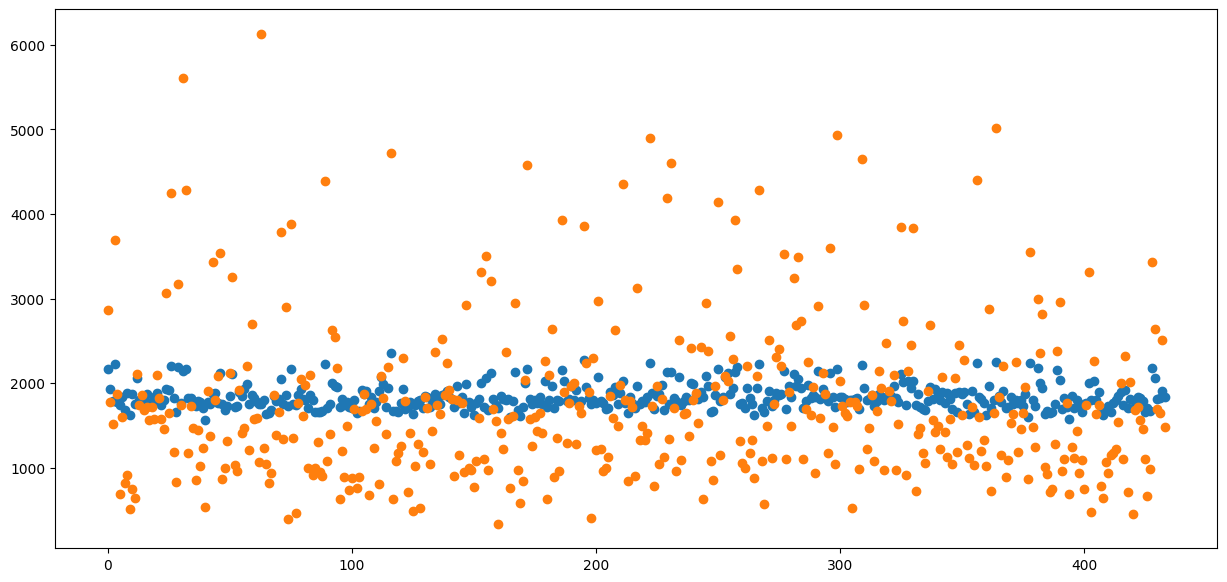

In [58]:
plt.subplots(figsize= (15,7))
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), y_test)
plt.show()
